In [313]:
## Import the necessary Libraries 

import numpy as np # linear algebra
import pandas as pd # 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [258]:
#  Read the data set and load it into a data frame
df = pd.read_csv(r"/Users/Abhishek/Desktop/vehicle.csv")
df.head(5) ## view records of the data

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [259]:
# get the generic information of the data, shape of the data number 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [260]:
## get the generic information of the data
## shape of the dataframe, null values existence,

print("Shape of Data (Rows,Columns)", df.shape)
print ("Are there null values in the data:",df.isnull().values.any())
print("---------------------------------------------")

print("Categorical and Non Categorical Columns")
cat_col = []
non_cat_col = []
for col in df.columns:
    if df[col].dtype.name == 'object':
        cat_col.append(col)
    else:
        non_cat_col.append(col)
print("Columns with Categorical Data", cat_col)
print("Columns with Non Categorical Data", non_cat_col)
print("---------------------------------------------")

### are there duplicate records
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows based on all columns are :",duplicateRowsDF)

Shape of Data (Rows,Columns) (846, 19)
Are there null values in the data: True
---------------------------------------------
Categorical and Non Categorical Columns
Columns with Categorical Data ['class']
Columns with Non Categorical Data ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio']
---------------------------------------------
Duplicate Rows based on all columns are : Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_r

In [261]:
##null values distribution across columns within the data set
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

## Statistical observations

In [262]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


## Outlier detection using box plot

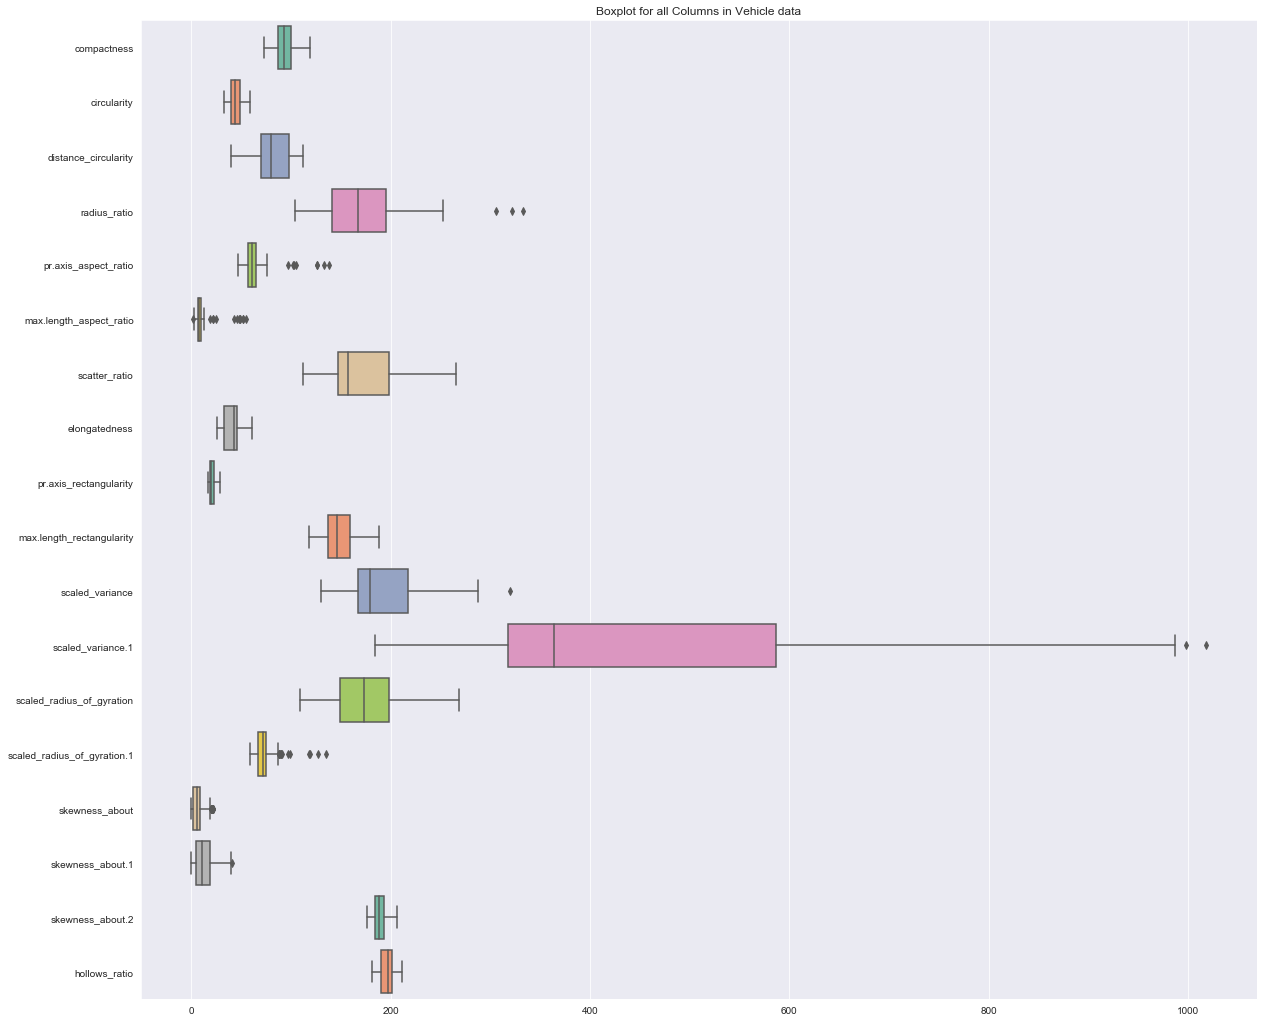

In [263]:
## boxplot for outliers detection
figsize_x = 20
figsize_y = 18
f,ax = plt.subplots(figsize=(figsize_x,figsize_y))
sns.boxplot(data=df, orient="h", palette="Set2", ax =ax)
ax.set_title("Boxplot for all Columns in Vehicle data")
plt.show();

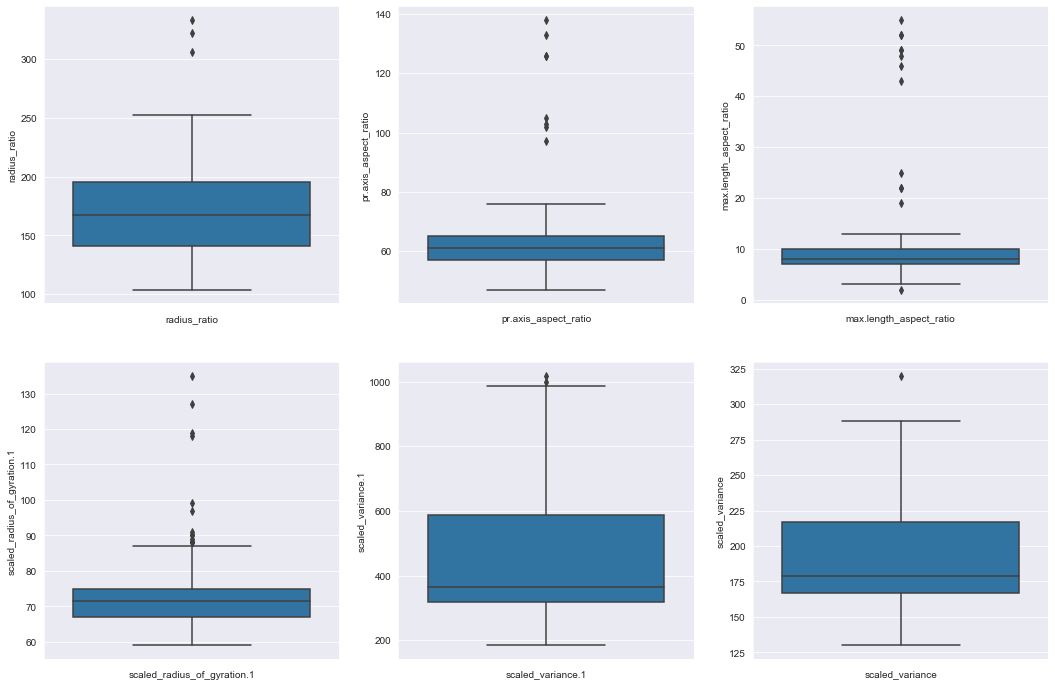

In [264]:
## Certain columns have more number of outliers. 
## visualize them further
import math
def showdetailedOutliers (column_name,df):
    no_cols = 3
    no_of_rows = math.ceil(len(column_name)/no_cols)
    figsize_x = 18
    figsize_y = 12
    fig, axes = plt.subplots(ncols=3, nrows=no_of_rows, figsize=(figsize_x,figsize_y))
    
    ## loop through the data frame columns
    for cols,ax in zip(column_name,axes.flat):
        #print ("Cols:", cols,"Axes:", ax)
        sns.boxplot(y=cols, data=df, ax=ax)
        #sns.distplot(df[cols], hist=True, ax=ax)
        ax.set(xlabel=cols)
    plt.show();

column_name = ["radius_ratio","pr.axis_aspect_ratio","max.length_aspect_ratio",
               "scaled_radius_of_gyration.1","scaled_variance.1","scaled_variance"]
showdetailedOutliers(column_name,df)


### Removing outliers

In [265]:
df["radius_ratio"][df["radius_ratio"] > 250].count()
df["pr.axis_aspect_ratio"][df["pr.axis_aspect_ratio"] > 80].count()
df["max.length_aspect_ratio"][df["max.length_aspect_ratio"] > 15].count()
df["scaled_radius_of_gyration.1"][df["scaled_radius_of_gyration.1"] > 87].count()
df["scaled_variance.1"][df["scaled_variance.1"] > 950].count()
df["scaled_variance"][df["scaled_variance"] > 300].count()

4

8

12

15

9

1

Outliers

1) Initial Boxplots indicates there are outliers in 6 different columns.

2) To get better understanding we plot indivdual column box plots and get the count of outlier values

3) scaled_radius_of_gyration.1 and scaled_variance.1 have higher number of outliers amongst the total number of outliers present in multiple columns.

4) We could see that around 5% fo the total records are outliers across multiple columns. (Count ~ 48). Hence we choose to remove the outliers assuming that they will have not any impact due to information loss since the count is low.

## Removing Outliers

In [266]:
## remove the outliers
df = df[df["radius_ratio"] < 250]
df = df[df["pr.axis_aspect_ratio"] < 80]
df = df[df["max.length_aspect_ratio"] < 18]
df = df[df["scaled_radius_of_gyration.1"] <87]
df = df[df["scaled_variance.1"] < 950]

In [267]:
df = df[df["scaled_variance"] < 300]

## Handling null values

In [268]:
df_1 = df.copy()

In [269]:
df_1.drop("class", axis=1, inplace=True)

In [270]:
df_1 = df_1.fillna(df_1.median())

In [271]:
df_1.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [272]:
for cols in df.columns:
    if (df[cols].dtypes == np.float64):
        df[cols] = df[cols].fillna(df[cols].median())

In [273]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [274]:
df_1.shape
df.shape

(792, 18)

(792, 19)

## Univariate Analysis

In [275]:
## The function prints multiple dsitribution plots. The rows and columns indicicate the matrix of the 
## diagrams
def multipleDistPlot (no_of_rows,no_of_cols,data_df):
    ## set the subplots count
    figsize_x = 30/no_of_cols
    figsize_y = 18
    fig, axes = plt.subplots(ncols=no_of_cols, nrows=no_of_rows, figsize=(figsize_x,figsize_y))
    plt.subplots_adjust(hspace=0.8, wspace=0.2)
    ## loop through the data frame columns
    for cols,ax in zip(data_df.columns,axes.flat):
        #print ("Cols:", cols,"Axes:", ax)
        sns.distplot(data_df[cols], hist=True, ax=ax)
        ax.set(xlabel=cols)

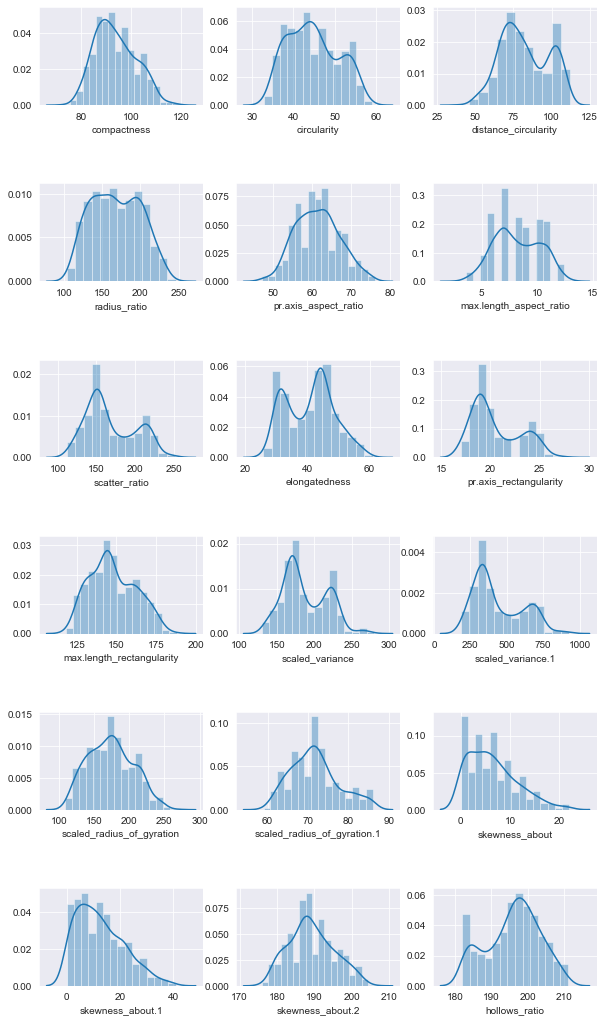

In [276]:
multipleDistPlot(6,3,df_1)

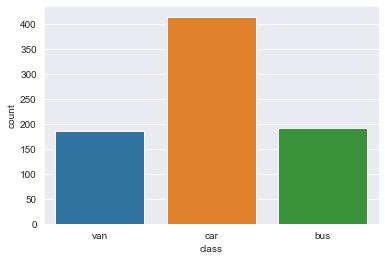

In [277]:
sns.countplot(x = "class", data=df)

#### Findings of Initial Data Analyis

There are 846 rows present in the data set with 19 Columns for each row.

18 Columns have non categorical datatype. (int64 and float64)

The columns "class" has categorical data having 3 different values of van,car and bus.

The graph shows the distribution of the data across the three classes. Class type car takes up 50% of the data within 
the Vehicle Data Set. While van and bus have near about similar counts within the data set.

Null Values are present within the data set. Columns radius_ratio and skewness_about have the highest number of null values.



#### Statistical Inference

Columns have data distributed across multiple scales.

Several Column data have distributions that are not unimodal (e.g. distance_circularity,scatter_ratio,elongatedness
Column skweness_about, skewness_about.1 have data that is left skewed whereas skewness_about.2 data is nearly normally distributed.

Some columns have long right tail (e.g. pr.axis_aspect_ratio) evident from the distplot and chances are that they will have outliers.

Null values are handled by replacing with median

Outliers are dropped

### Multivariate analysis

We will check in the following sections, how each column is corelated to each other using pairplot and correlation map.

The objective is to identify the columns which donot have corelation with others.

For the columns which show corelation between each other, we will apply PCA to reduce the number of features without loosing the important information.

In [278]:
## we will use the original dataframe and not have any null replacement
## or outliers removal since the data will be used to just visualize the data since this is for analysis only.

In [279]:
## corelation Map 
corr = df.corr().round(2)
corr.style.background_gradient(cmap='coolwarm')

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1,0.68,0.78,0.75,0.22,0.54,0.8,-0.78,0.81,0.66,0.79,0.81,0.56,-0.29,0.23,0.15,0.31,0.4
circularity,0.68,1,0.79,0.65,0.22,0.6,0.85,-0.82,0.85,0.97,0.81,0.85,0.94,0.06,0.14,-0.03,-0.12,0.06
distance_circularity,0.78,0.79,1,0.81,0.26,0.7,0.91,-0.91,0.9,0.76,0.89,0.9,0.7,-0.25,0.1,0.26,0.13,0.34
radius_ratio,0.75,0.65,0.81,1,0.67,0.47,0.81,-0.85,0.79,0.58,0.82,0.8,0.56,-0.41,0.05,0.18,0.41,0.51
pr.axis_aspect_ratio,0.22,0.22,0.26,0.67,1,0.12,0.24,-0.33,0.21,0.17,0.26,0.23,0.19,-0.29,-0.05,-0.04,0.38,0.39
max.length_aspect_ratio,0.54,0.6,0.7,0.47,0.12,1,0.55,-0.54,0.56,0.68,0.47,0.52,0.45,-0.3,0.11,0.14,0.03,0.38
scatter_ratio,0.8,0.85,0.91,0.81,0.24,0.55,1,-0.97,0.99,0.81,0.98,1,0.78,-0.04,0.06,0.21,0.01,0.16
elongatedness,-0.78,-0.82,-0.91,-0.85,-0.33,-0.54,-0.97,1,-0.95,-0.76,-0.97,-0.96,-0.75,0.11,-0.04,-0.18,-0.11,-0.24
pr.axis_rectangularity,0.81,0.85,0.9,0.79,0.21,0.56,0.99,-0.95,1,0.81,0.96,0.99,0.78,-0.02,0.08,0.21,-0.01,0.15
max.length_rectangularity,0.66,0.97,0.76,0.58,0.17,0.68,0.81,-0.76,0.81,1,0.75,0.8,0.87,0.04,0.13,-0.02,-0.12,0.09


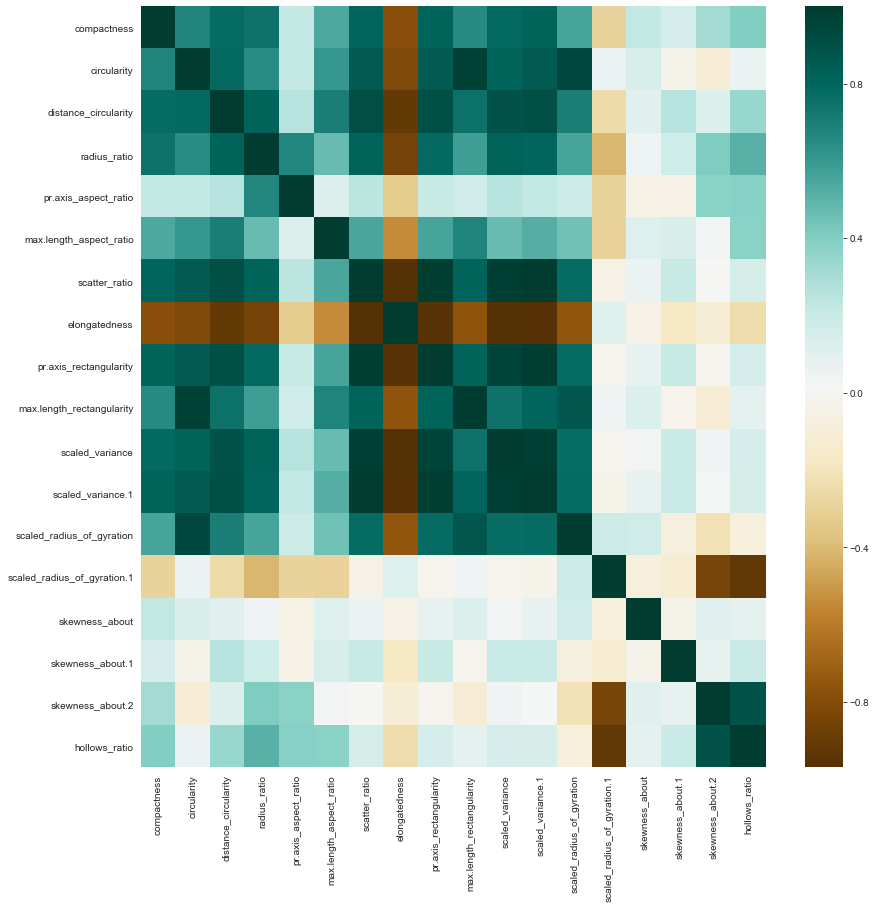

In [280]:
## print the heat map
f,ax=plt.subplots(figsize=(14,14))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap='BrBG',ax =ax)

In [281]:
## split the pairplots into smaller sets for better visualisation
## we choose the columns for visualisation that have higher corelation as per the heat map. 
##we define this as Set High.

In [282]:
df1 = df[['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration','class']]
#set high

In [283]:
## columns which as per the heat map have lower core
#set low
df2 = df[['pr.axis_aspect_ratio', 'max.length_aspect_ratio','scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']]

### Observations from Heat Map

We notice that the following set of columns have high corelation amongst each other (Potential target for PCA Feature reduction)

['compactness', 'circularity', 'distance_circularity', 'radius_ratio','scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity','scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration','class']

However we also notice that pr.axis_aspect_ratio and max.length_aspect_ratio donot have corelation with any other columns apart from themselves.

Similarly scaled_radius_of_gyration.1 has high negative corealtion with skewness_about.2 and hollows_ratio columns. it has very less corelation with others.

Similary hollows_ratio has high corelation with skewness_about.2 and scaled_radius_of_gyration.
We will look at each of the combinations to further analyse the corelation patterns.

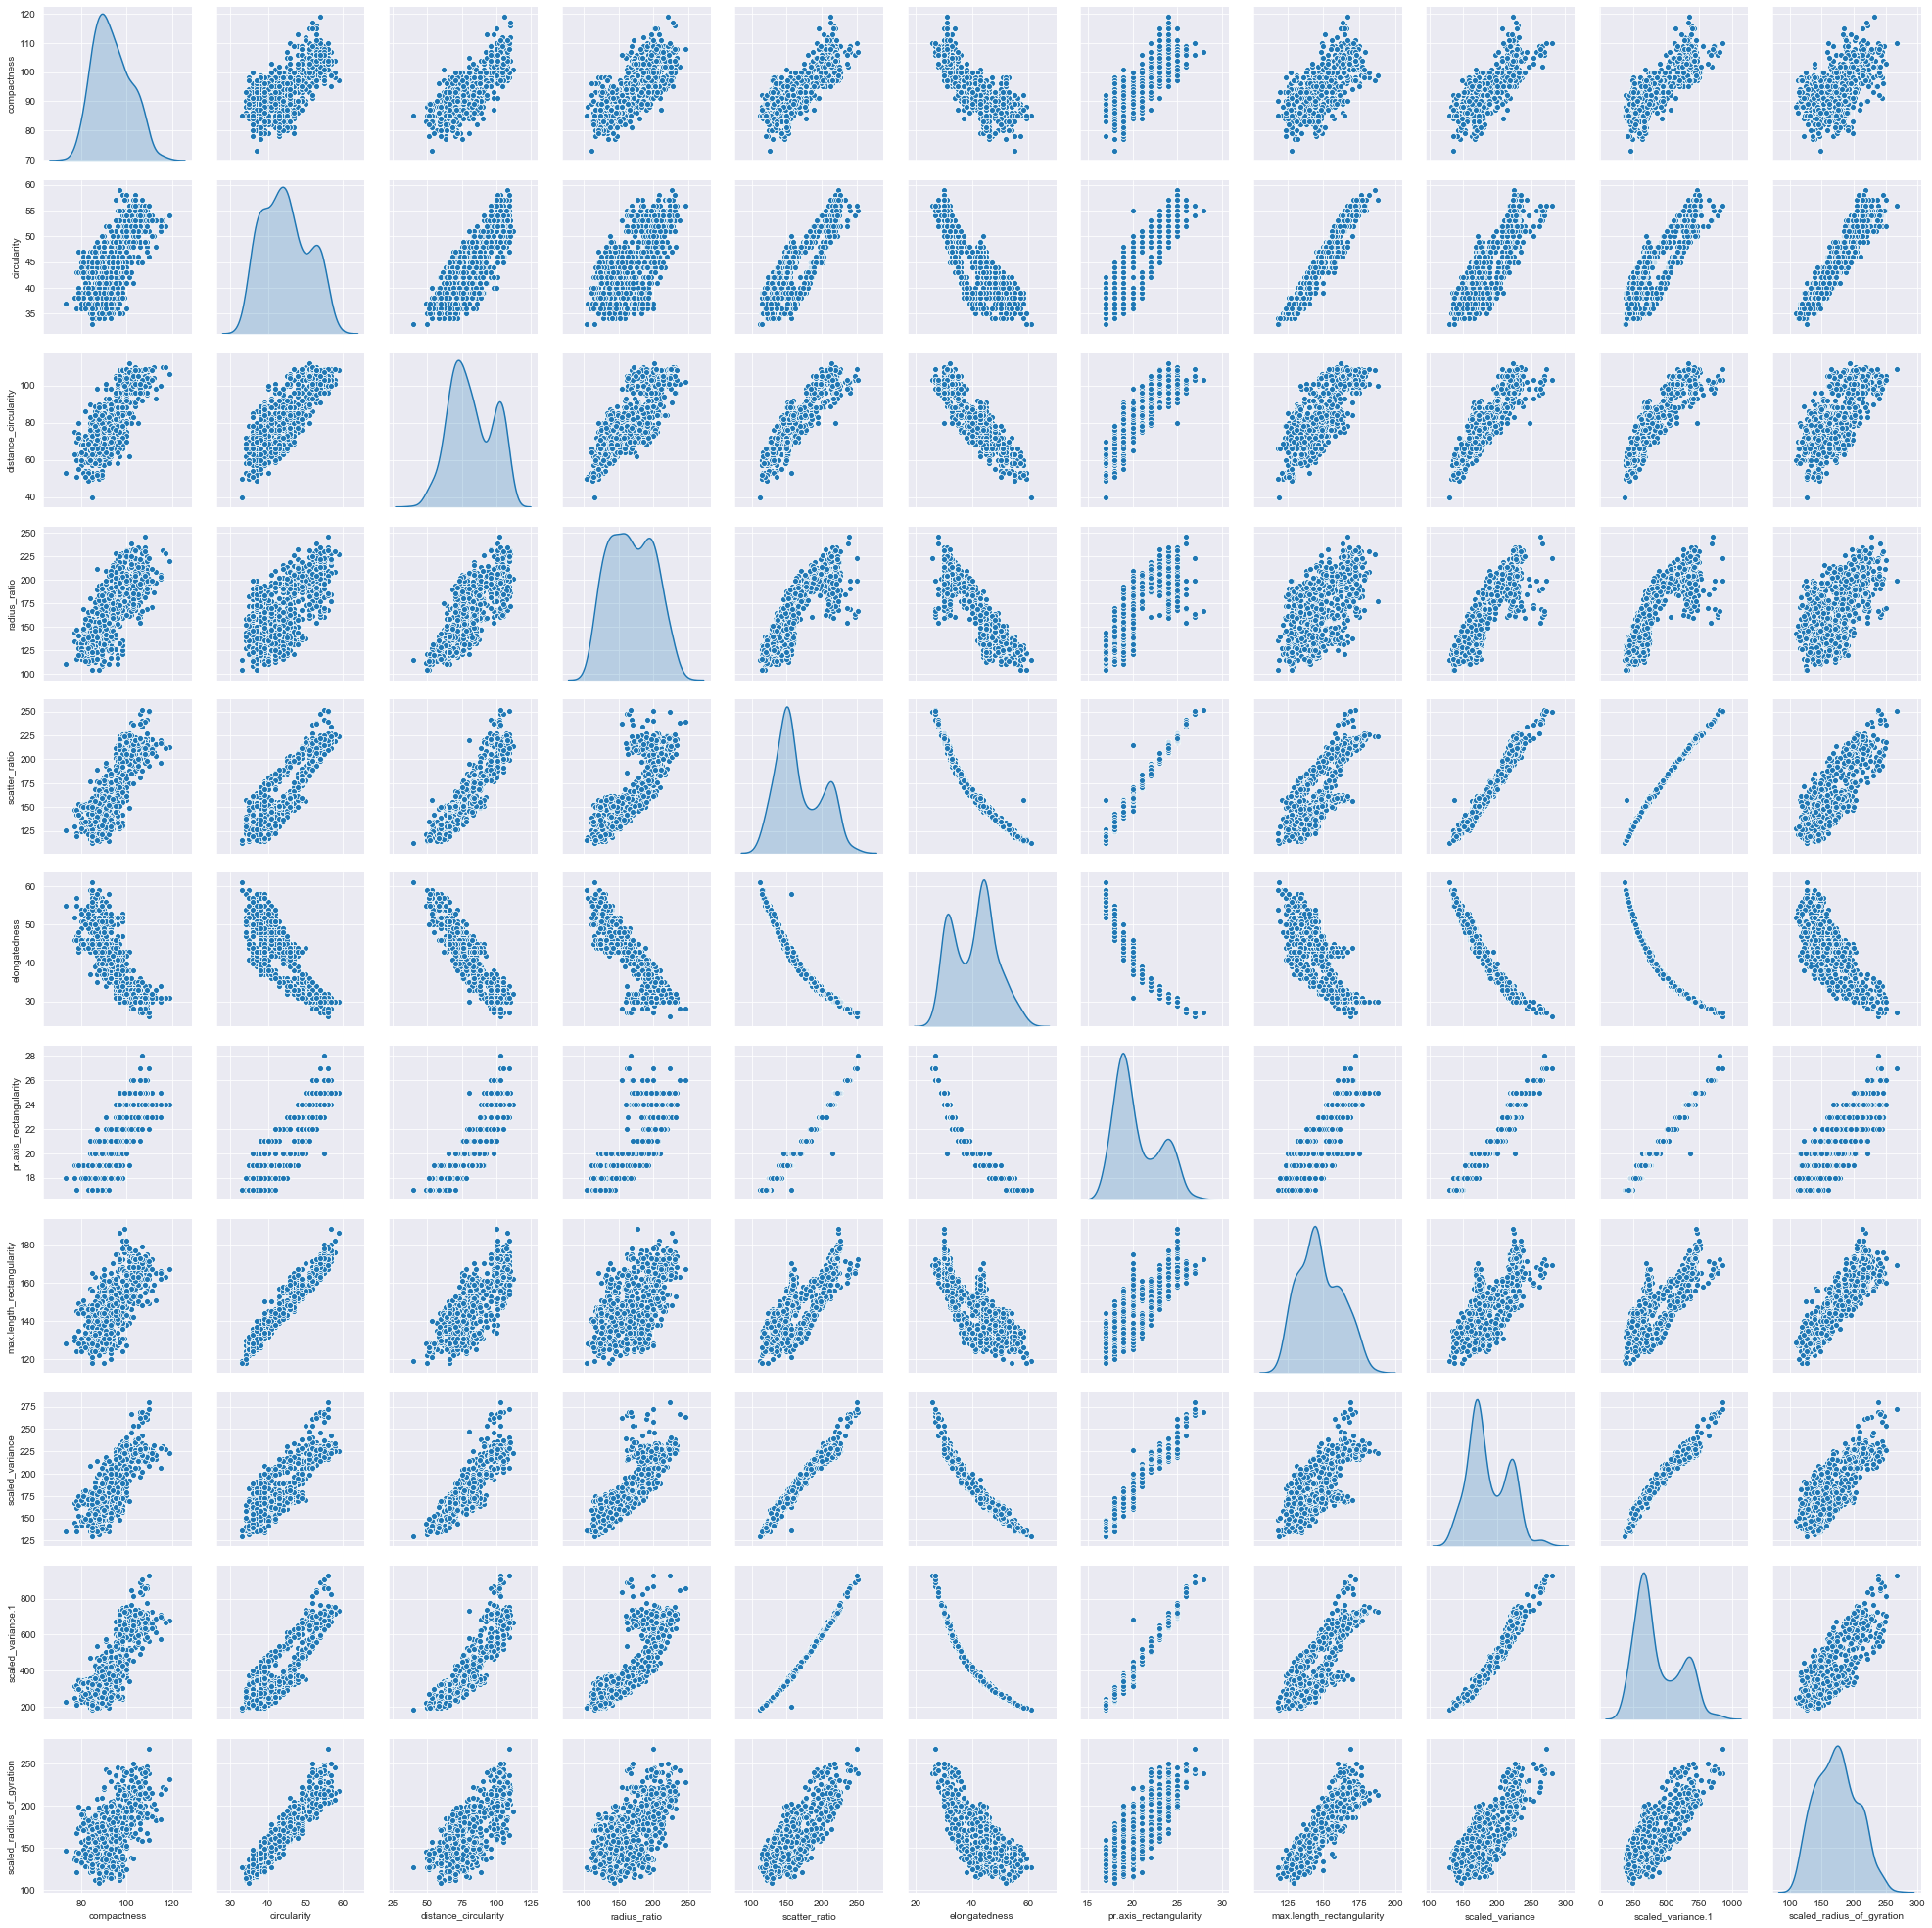

In [284]:
## pair plot for the set of columns that have a higher corelation amongst each other as per the heat map
sns.pairplot(data = df1,palette="coolwarm", diag_kind="kde")

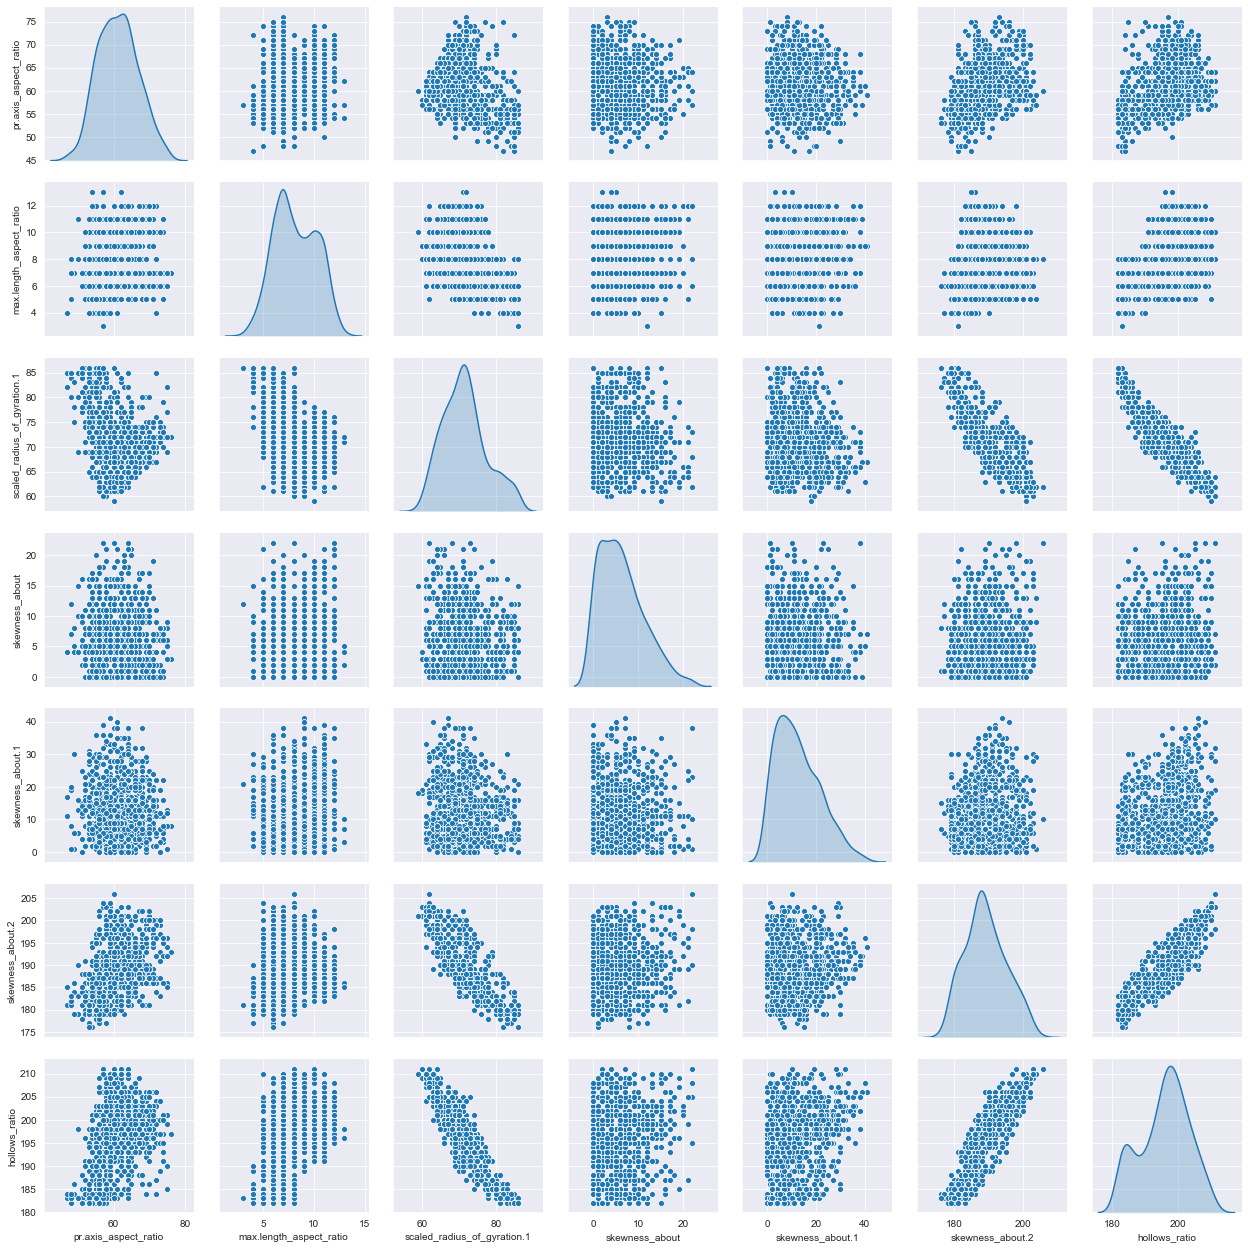

In [285]:
## pair plot for the set of columns that have a lower corelation amongst each other as per the heat map
sns.pairplot(data = df2,palette="husl", diag_kind="kde")

### Observations from pair plot

Heat map indicated +Ve corelation between pr.axis_aspect_ratio and max.length_aspect_ratio. However on plotting the values we could see that there is not much of corelation if we ignore the outliers. (As per our earlier analysis through box plots we could see that max.length_aspect.ratio had highest number of outliers).

Hence we will include both the columns in our model. Also since they are not corelated we will not apply PCA on these columns.

Similarly 'skewness_about', 'skewness_about.1' columns donot have corelation with any other column and hence we will not apply PCA on those columns as well but include them as features in our model.

Hollows_ratio has got high corelation column skewness_about.2 and scaled_radius_of_gyration.1. So we will be use only Hollow_ratio column and drop skewness_about.2 and scaled_radius_of_gyration.1 assuming that the information contained in hollow_ratio column will also cover information contained in skewness_about.2 and scaled_radius_of_gyration.1 column.

However Hollow Ratio is not corelated to any other columns and hence we will not apply PCA on it but consider it as a feature in our model.

Heat map results are validated from the pair plot diagrams.

### Summary

There are a set of features which are corelated to each other and hence will be used for PCA.

Out of the remaining columns, we choose only few columns as representational for the remaining.

We will apply PCA on the first set and merge with the remaining columns to create the data for model training and testing.

### Actions based on the Data Exploration

Null Values - Replace Null values with median for the corresponding columns

Outliers - Remove the outliers from the data set based on earlier observations.

Outcome variable is categorical(dtype as object) and needs to be replaced by 0(bus),1(car) and 2(van) for the three categories and changed to int64 datatype.

Feature Selection

Create 2 different sets of columns.

List High - List of columns which show very high corelation amongst each other.

List Low - List of Columns which show low corelation amongst each other.

Since the data is on different scales in the columns, we will have to scale the data before applying PCA.

List High - Apply PCA to identify the features containing the majority of the information.

List Low - Donot apply PCA. Replace multiple columns which are highly corelated to each other only by a single 
representational column as per the analysis.

Merge both the dataset and create the final model.

drop skewness_about.2 and scaled_radius_of_gyration.1 column

Split the data into training and testing and then train the model.

Finally test the model with the test data and generate reports.

## Preprocessing data

In [286]:
## DATA Preprocessing

## Copy data into a new data frame which will be used
work_df = pd.read_csv(r"/Users/Abhishek/Desktop/vehicle.csv")
work_df.shape
## create a new column with index as rownumbers to be used for merging
work_df.head()

(846, 19)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [287]:
## convert class column from category to numerical values
work_df["class"] = work_df["class"].astype("category")
work_df["class"] = work_df["class"].cat.codes
work_df["class"] = work_df["class"].astype("int64")
## replace null values with median
for cols in work_df.columns:
    ## class column is categorical
    if(cols != "class"): 
        work_df[cols] = work_df[cols].fillna(work_df[cols].median())

In [288]:
work_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [289]:
## remove the outliers
## the limits are selected based on the visual boxplot whiskers for these columns.
work_df = work_df[work_df["radius_ratio"] < 250]
work_df = work_df[work_df["pr.axis_aspect_ratio"] < 80]
work_df = work_df[work_df["max.length_aspect_ratio"] < 18]
work_df = work_df[work_df["scaled_radius_of_gyration.1"] <87]
work_df = work_df[work_df["scaled_variance.1"] < 950]
work_df = work_df[work_df["scaled_variance"] < 300]
## reset the index post cleaning the outliers
work_df = work_df.reset_index(drop=True)

In [290]:
# Store features high corelation and low corelation column names
high_cor_cols = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
        'scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
        'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration']

## drop the columns skewness_about.2 and scaled_radius_of_gyration.1
low_cor_cols = ['pr.axis_aspect_ratio', 'max.length_aspect_ratio','skewness_about', 'skewness_about.1','hollows_ratio']
        #'scaled_radius_of_gyration.1', 
        #'skewness_about.2', 
        
## drop the columns skewness_about.2 and scaled_radius_of_gyration.1

x_columns = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']
y_columns = ['class']

In [291]:
## Create the Feature and Prediction Dataframe
X = work_df[x_columns]
Y = work_df[y_columns]

In [292]:
## Scale the data using Zscore

X_std = X.apply(zscore)

In [293]:
## Apply PCA on high Corelation columns
## Copy the high corelation columns
X = X_std[high_cor_cols]
covMatrix = np.cov(X,rowvar=False)
covMatrix

array([[ 1.00123762,  0.67850385,  0.78208643,  0.75023426,  0.80582863,
        -0.7801531 ,  0.80844619,  0.66734295,  0.78516161,  0.8094131 ,
         0.56877736],
       [ 0.67850385,  1.00123762,  0.7901529 ,  0.64713688,  0.85135903,
        -0.81880673,  0.84957826,  0.96580933,  0.81268341,  0.84331756,
         0.93532859],
       [ 0.78208643,  0.7901529 ,  1.00123762,  0.81188733,  0.91120588,
        -0.90894158,  0.90187687,  0.76691391,  0.89223387,  0.89627033,
         0.70214767],
       [ 0.75023426,  0.64713688,  0.81188733,  1.00123762,  0.80645133,
        -0.85268071,  0.78283143,  0.58170064,  0.81557452,  0.79718175,
         0.56256919],
       [ 0.80582863,  0.85135903,  0.91120588,  0.80645133,  1.00123762,
        -0.97525565,  0.99017225,  0.80792035,  0.9780642 ,  0.99428068,
         0.78721372],
       [-0.7801531 , -0.81880673, -0.90894158, -0.85268071, -0.97525565,
         1.00123762, -0.95326272, -0.76783521, -0.97113481, -0.96045076,
        -0.757

In [294]:
pca = PCA(n_components=11)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

eigen values

In [295]:
print(pca.explained_variance_)

[9.28884856e+00 8.11226876e-01 3.13912694e-01 2.46769541e-01
 1.58706975e-01 9.74384425e-02 4.14977818e-02 2.36902666e-02
 1.63257975e-02 1.11870210e-02 4.00990293e-03]


eigen vectors

In [296]:
print(pca.components_)

[[ 0.27370758  0.29829275  0.30480235  0.27308106  0.32289684 -0.31757963
   0.32046176  0.28497997  0.31667592  0.32079378  0.27641827]
 [ 0.28706203 -0.42905131  0.14965038  0.41738791  0.08153502 -0.14920586
   0.06152339 -0.46164011  0.13523497  0.08583328 -0.51520825]
 [-0.81524411 -0.12924969  0.00284796 -0.01421961  0.17516784 -0.2470306
   0.1285511  -0.30247916  0.27590884  0.16211341  0.12778059]
 [ 0.24212834 -0.17276831 -0.08567472 -0.7995574   0.21664125  0.01019995
   0.28789561 -0.07569841  0.17184256  0.26547705 -0.17097735]
 [-0.27091783  0.00872421  0.73803035 -0.16421301 -0.01011942  0.00644305
   0.00782379  0.34515934 -0.16901099 -0.08421531 -0.44707458]
 [-0.18354852  0.13340706 -0.56941057  0.18256184  0.13446736 -0.10405057
   0.15559494  0.45258939 -0.05105363  0.15068502 -0.55469621]
 [ 0.10193173  0.01077795 -0.06449597 -0.20116645 -0.09794027 -0.67383998
  -0.48283919  0.12195185  0.34534943 -0.32668825 -0.08494763]
 [ 0.04075922 -0.22202318 -0.03970278 -0.0

percentage of variation explained

In [297]:
print(pca.explained_variance_ratio_)

[8.43396970e-01 7.36567385e-02 2.85022426e-02 2.24058646e-02
 1.44100726e-02 8.84709086e-03 3.76786242e-03 2.15099847e-03
 1.48232885e-03 1.01574480e-03 3.64086029e-04]


#### elbow plot

<BarContainer object of 11 artists>

Text(0, 0.5, 'variation explained')

Text(0.5, 0, 'eigen value')

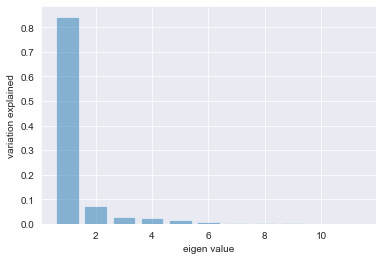

In [298]:
plt.bar(list(range(1,12)),pca.explained_variance_ratio_,alpha=0.5,align='center')
plt.ylabel("variation explained")
plt.xlabel("eigen value")
plt.show()

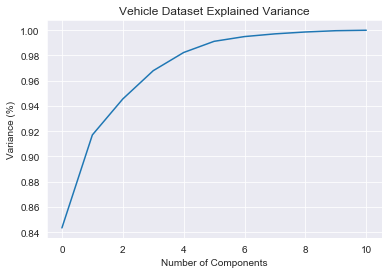

In [299]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Vehicle Dataset Explained Variance')
plt.show();

As we can see after 6 the variation explained is almost 0 so lets take 6 principal components

In [300]:
# Create a PCA with 6 components
pca_6 = PCA(n_components= 6)

# Conduct PCA
X_pca_1 = pca_6.fit_transform(X)
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca_1.shape[1])

Original number of features: 11
Reduced number of features: 6


#### Findings After applying PCA

We can see that the first Component explains more than 80% of variation.

Between first three components, more than 95% of the information is captured.

We will try to plot the values the three components for visualisation of the information distribution.

In [301]:
## creata a data Frrame from PCA
principalDataframe = pd.DataFrame(data = X_pca_1)

In [302]:
## combine the data frames for final feature selection
other_features = X_std[low_cor_cols]#stores the columns that donot have corelation

## we use the data frame for data distribution visualization after PCA application and reduction of features
X_pca_visual = pd.merge(principalDataframe,Y,right_index=True, left_index=True)


#merge with the data frame from pca (first three components)
principalDataframe1 = principalDataframe.iloc[:,0:3]
#principalDataframe1.head()



In [338]:
X = pd.merge(principalDataframe,other_features,right_index=True, left_index=True)
X.head()

,0,1,2,3,4,5,pr.axis_aspect_ratio,max.length_aspect_ratio,skewness_about,skewness_about.1,scaled_radius_of_gyration.1,skewness_about.2,hollows_ratio
0,0.176100,-0.700073,-0.654770,-0.675656,0.166014,0.135481,1.927141,0.880361,-0.087635,0.369388,-0.274806,-0.374486,0.127601
1,-1.688819,-0.065694,-0.179037,0.249785,0.576612,-0.418190,-0.778616,0.391875,0.520052,0.146958,0.064093,-0.042839,0.405471
2,3.847557,0.292336,-0.033299,-0.247812,-0.139825,-0.691940,0.844838,0.880361,1.532863,-0.409118,0.233543,-0.208663,-0.011335
3,-2.014300,0.638240,-0.687909,-0.094609,0.827168,0.219910,0.303687,0.391875,-0.087635,-0.297903,-1.460952,1.615393,1.516952
4,-0.916397,0.209580,-0.580870,-0.348198,-0.564603,-0.089089,0.664455,-1.073581,1.330301,-1.298839,-0.952604,1.781217,1.100147


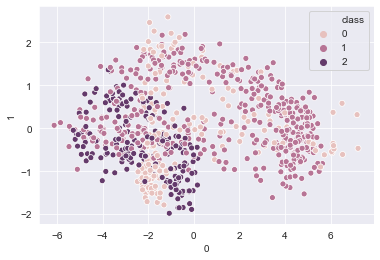

In [339]:
## Scatter visualization of data across 1st two components which provides more than 90% of information
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(X_pca_visual.loc[:,0],X_pca_visual.loc[:,1], hue = X_pca_visual["class"], palette=cmap )

## 0 is bus
## 1 is car
## 2 is van

### SVM with PCA

In [340]:
X.shape

(809, 13)

In [341]:
## select all the columns not part of PCA
low_cor_cols = ['pr.axis_aspect_ratio', 'max.length_aspect_ratio','skewness_about', 'skewness_about.1',
                'scaled_radius_of_gyration.1','skewness_about.2','hollows_ratio']       
other_features = X_std[low_cor_cols]

## combine with all the 6 components received from PCA transformation.
X = pd.merge(principalDataframe,other_features,right_index=True, left_index=True)

## split, Train and test model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

## build the SVM model on training data
svc_model = SVC (C =10, kernel = "rbf", gamma=0.01)
svc_model.fit(X_train,y_train)
prediction= svc_model.predict(X_test)
print ("Score on Training Data",svc_model.score(X_train, y_train))
print ("Score on Test Data",svc_model.score(X_test,y_test))
print ("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
target_names = ['bus', 'car', 'Van']
print(metrics.classification_report(y_test, prediction, target_names=target_names))


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Score on Training Data 0.9787985865724381
Score on Test Data 0.9629629629629629
Confusion Matrix:
 [[ 55   2   1]
 [  0 116   2]
 [  0   4  63]]
              precision    recall  f1-score   support

         bus       0.95      1.00      0.97        55
         car       0.98      0.95      0.97       122
         Van       0.94      0.95      0.95        66

    accuracy                           0.96       243
   macro avg       0.96      0.97      0.96       243
weighted avg       0.96      0.96      0.96       243



### SVM without PCA

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size = 0.3, random_state = 10) 
## build the SVM model on training data
svc_model = SVC (C =.1, kernel = "linear", gamma=1)
svc_model.fit(X_train,y_train)
prediction= svc_model.predict(X_test)
print ("Score on Training Data",svc_model.score(X_train, y_train))
print ("Score on Test Data", svc_model.score(X_test,y_test))
print ("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
target_names = ['bus', 'car', 'Van']
print("---- Classification Report -----")
print(metrics.classification_report(y_test, prediction, target_names=target_names))

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Score on Training Data 0.9381625441696113
Score on Test Data 0.9218106995884774
Confusion Matrix:
 [[ 52   7   4]
 [  3 110   0]
 [  0   5  62]]
---- Classification Report -----
              precision    recall  f1-score   support

         bus       0.83      0.95      0.88        55
         car       0.97      0.90      0.94       122
         Van       0.93      0.94      0.93        66

    accuracy                           0.92       243
   macro avg       0.91      0.93      0.92       243
weighted avg       0.93      0.92      0.92       243



### As we can see the model using PCA has an accuracy of 96% but the model without PCA has only 92% accuracy